In [70]:
from google.colab import drive
import gdown
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, roc_auc_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc
from sklearn.cluster import DBSCAN
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import regularizers
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


In [71]:
drive.mount('/content/drive', force_remount=True)
# Folder ID (from Google Drive link)
folder_id = '1SisQm9KlEV2fo5pwLMkySSVm4rid3l_d'
# Destination path where the folder will be downloaded
destination_path = '/content/drive/MyDrive/Intrusion Dataset/'
# Download folder using gdown
gdown.download_folder(id=folder_id, output=destination_path, quiet=False, use_cookies=False)

Mounted at /content/drive


Retrieving folder contents


Retrieving folder 1g0qEiPaQ8Au8S6l4-dzG-L4axxAb1UXm Phishstorm
Processing file 1-2BL97yqUdsN97MBe1SldAsOEfL8cUNs urlset.csv
Processing file 1Zb4ZapGYPOGH50QMkJsYsXzRA0S3yypH urlset.csv


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1-2BL97yqUdsN97MBe1SldAsOEfL8cUNs
To: /content/drive/MyDrive/Intrusion Dataset/Phishstorm/Phishstorm/urlset.csv
100%|██████████| 12.3M/12.3M [00:00<00:00, 71.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Zb4ZapGYPOGH50QMkJsYsXzRA0S3yypH
To: /content/drive/MyDrive/Intrusion Dataset/Phishstorm/urlset.csv
100%|██████████| 12.3M/12.3M [00:00<00:00, 62.0MB/s]
Download completed


['/content/drive/MyDrive/Intrusion Dataset/Phishstorm/Phishstorm/urlset.csv',
 '/content/drive/MyDrive/Intrusion Dataset/Phishstorm/urlset.csv']

In [72]:
# Load the data into pandas DataFrames
data = pd.read_csv('/content/drive/MyDrive/Phishstorm/urlset.csv', encoding='ISO-8859-1', on_bad_lines='skip')
train_data = pd.read_csv('/content/drive/MyDrive/Intrusion Dataset/NSL_KDD_Train.csv', encoding='ISO-8859-1', on_bad_lines='skip')
test_data = pd.read_csv ('/content/drive/MyDrive/Intrusion Dataset/NSL_KDD_Test.csv', encoding='ISO-8859-1', on_bad_lines='skip')

# Display the first few rows of the datasets to verify
print(">>> Training Dataset...")

print(train_data.head())
print(">>> Testing Dataset...")
print(test_data.head())

<ipython-input-72-ec6615a52a12>:2: DtypeWarning: Columns (1,2,3,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/Phishstorm/urlset.csv', encoding='ISO-8859-1', on_bad_lines='skip')


>>> Training Dataset...
   0  tcp ftp_data   SF  491   0.1  0.2  0.3  0.4  0.5  ...   25  0.17  0.03  \
0  0  udp    other   SF  146     0    0    0    0    0  ...    1  0.00  0.60   
1  0  tcp  private   S0    0     0    0    0    0    0  ...   26  0.10  0.05   
2  0  tcp     http   SF  232  8153    0    0    0    0  ...  255  1.00  0.00   
3  0  tcp     http   SF  199   420    0    0    0    0  ...  255  1.00  0.00   
4  0  tcp  private  REJ    0     0    0    0    0    0  ...   19  0.07  0.07   

   0.17.1  0.25  0.26  0.27  0.05  0.28   normal  
0    0.88  0.00  0.00  0.00   0.0  0.00   normal  
1    0.00  0.00  1.00  1.00   0.0  0.00  neptune  
2    0.03  0.04  0.03  0.01   0.0  0.01   normal  
3    0.00  0.00  0.00  0.00   0.0  0.00   normal  
4    0.00  0.00  0.00  0.00   1.0  1.00  neptune  

[5 rows x 42 columns]
>>> Testing Dataset...
   0   tcp   private   REJ    0.1    0.2  0.3  0.4  0.5  0.6  ...  10.1  \
0  0   tcp   private   REJ      0      0    0    0    0    0  ...   

In [73]:
# Define the list of column names
columns = ['duration', 'protocol_type', 'service', 'flag',
           'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
           'urgent', 'hot', 'num_failed_logins', 'logged_in',
           'num_compromised', 'root_shell', 'su_attempted',
           'num_root', 'num_file_creations', 'num_shells',
           'num_access_files', 'num_outbound_cmds', 'is_host_login',
           'is_guest_login', 'count', 'srv_count', 'serror_rate',
           'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
           'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
           'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
           'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
           'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
           'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
           'dst_host_srv_rerror_rate', 'class']

# Assign the column names to the training and testing datasets
train_data.columns = columns
test_data.columns = columns

# Verify the column names
print("Columns in the training dataset:")
print(train_data.columns)

print("\nColumns in the testing dataset:")
print(test_data.columns)

Columns in the training dataset:
Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')

Columns in the testing dataset:
Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_byt

In [74]:
# Combine the training and testing datasets into a single DataFrame
df = pd.concat([train_data, test_data], axis=0, ignore_index=True)

# Verify the combined dataset
print(f"Shape of the combined dataset: {df.shape}")
print(df.head())  # Display the first few rows of the combined dataset

Shape of the combined dataset: (148515, 42)
   duration protocol_type  service flag  src_bytes  dst_bytes  land  \
0         0           udp    other   SF        146          0     0   
1         0           tcp  private   S0          0          0     0   
2         0           tcp     http   SF        232       8153     0   
3         0           tcp     http   SF        199        420     0   
4         0           tcp  private  REJ          0          0     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                   1   
1               0       0    0  ...                  26   
2               0       0    0  ...                 255   
3               0       0    0  ...                 255   
4               0       0    0  ...                  19   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.00                    0.60   
1                    0.10                    0.05   
2              

In [75]:
# Check for null values in the training and testing datasets
print("Null values in the training dataset:")
print(df.isnull().sum())

Null values in the training dataset:
duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_s

In [76]:
# Remove rows with null values from the combined dataset
df_cleaned = df.dropna()

# Verify that the null values have been removed
print("Null values in the combined dataset after dropping:")
print(df_cleaned.isnull().sum())

# Check the shape of the dataset before and after dropping null values
print(f"\nOriginal combined dataset shape: {df.shape}")
print(f"Cleaned combined dataset shape (after removing null values): {df_cleaned.shape}")


Null values in the combined dataset after dropping:
duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate           

In [77]:
# Check for duplicate rows in the cleaned combined dataset
duplicates_combined = df_cleaned.duplicated().sum()

# Display the number of duplicate rows
print(f"Number of duplicate rows in the cleaned combined dataset: {duplicates_combined}")

# If there are duplicates, remove them
df = df_cleaned.drop_duplicates()

# Verify the dataset after removing duplicates
print(f"\nOriginal cleaned combined dataset shape: {df_cleaned.shape}")
print(f"Final dataset shape (after removing duplicates): {df.shape}")


Number of duplicate rows in the cleaned combined dataset: 610

Original cleaned combined dataset shape: (148515, 42)
Final dataset shape (after removing duplicates): (147905, 42)


**Visualization of Log Transformed 'duration' feature**

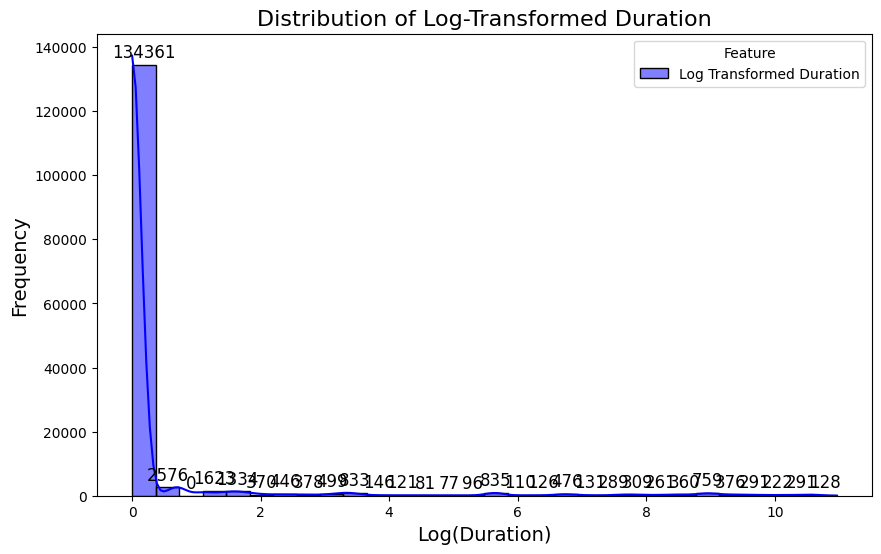

In [12]:
# Apply log transformation to the 'duration' feature
df_transformed_duration = np.log1p(df['duration'])  # log(x + 1)

# Create the histogram
plt.figure(figsize=(10, 6))
ax = sns.histplot(df_transformed_duration, kde=True, bins=30, color="blue", label="Log Transformed Duration")

# Add data labels on top of each bar
for p in ax.patches:
    # Get the height of each bar (the count)
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 9), textcoords='offset points')

# Title and labels
plt.title('Distribution of Log-Transformed Duration', fontsize=16)
plt.xlabel('Log(Duration)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add legend
plt.legend(title='Feature', loc='upper right')

# Show the plot
plt.show()

**Box Plot of Log-transformed src_bytes and dst_bytes**





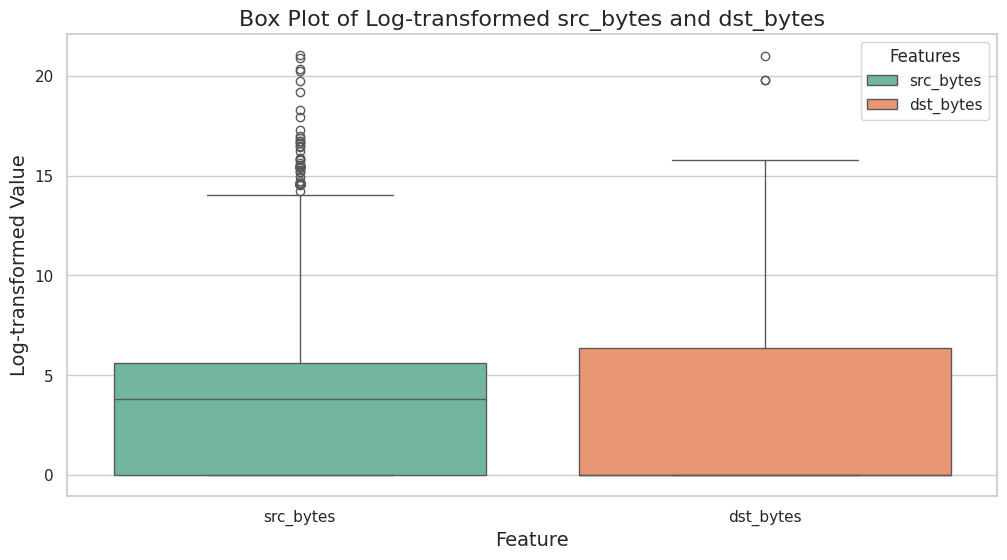

In [78]:
# Apply log transformation to make the data more visually interpretable (handling large ranges)
df_transformed = df[['src_bytes', 'dst_bytes']].apply(lambda x: np.log1p(x))

# Create the box plot
plt.figure(figsize=(12, 6))
ax = sns.boxplot(data=df_transformed, palette="Set2")

# Add data labels on top of the boxes (mean values in each box)
for i, box in enumerate(ax.artists):
    # Get the x, y coordinates for the box and set the label position
    box_width = box.get_width()
    box_height = box.get_height()
    box_x = box.get_x() + box_width / 2
    box_y = box.get_y() + box_height / 2
    ax.text(box_x, box_y, f'{box_height:.2f}', ha='center', va='center', fontsize=12, color='black')

# Add title, labels, and legend
plt.title('Box Plot of Log-transformed src_bytes and dst_bytes', fontsize=16)
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Log-transformed Value', fontsize=14)

# Add legend to describe what each box represents
plt.legend(['src_bytes', 'dst_bytes'], title='Features', loc='upper right')

# Show the plot
plt.show()

**Count Plot to visualize Class Distribution**

<ipython-input-79-6dd9694bbfbb>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='class', data=df, palette="Blues_d")
<ipython-input-79-6dd9694bbfbb>:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Class Distribution', loc='upper right')


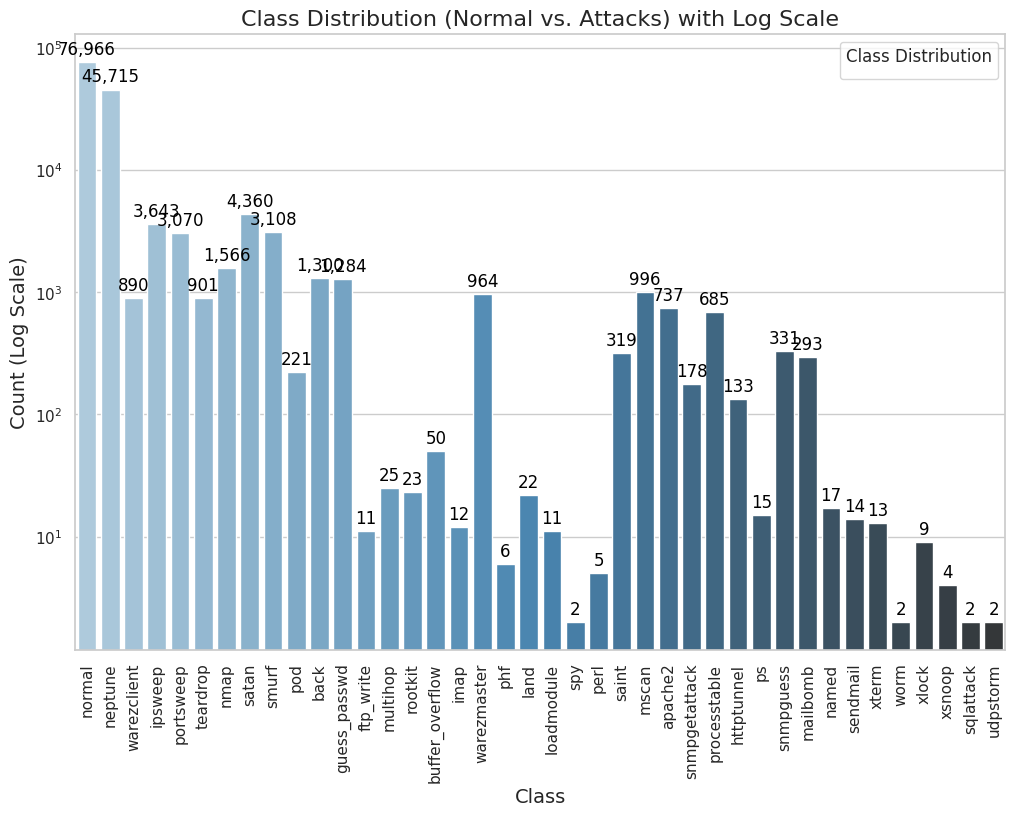

In [79]:
# Set the style for the plots
sns.set(style="whitegrid")

# 1. Count Plot with Log Scale: To better visualize class distribution
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='class', data=df, palette="Blues_d")

# Set log scale for better visualization of skewed data
plt.yscale('log')

# Add data labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 9), textcoords='offset points')

# Title and labels
plt.title('Class Distribution (Normal vs. Attacks) with Log Scale', fontsize=16)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Count (Log Scale)', fontsize=14)
plt.xticks(rotation=90)

# Show the legend
plt.legend(title='Class Distribution', loc='upper right')

# Show the plot
plt.show()

# Preprocess The Dataset.

In [80]:
# Map attack types to broader categories
attack_map = {
    'back': 'DoS', 'land': 'DoS', 'neptune': 'DoS', 'pod': 'DoS', 'smurf': 'DoS', 'teardrop': 'DoS',
    'apache2': 'DoS', 'udpstorm': 'DoS', 'processtable': 'DoS', 'mailbomb': 'DoS',

    'satan': 'Probe', 'ipsweep': 'Probe', 'nmap': 'Probe', 'portsweep': 'Probe', 'mscan': 'Probe', 'saint': 'Probe',

    'guess_passwd': 'R2L', 'ftp_write': 'R2L', 'imap': 'R2L', 'phf': 'R2L', 'multihop': 'R2L', 'warezmaster': 'R2L',
    'warezclient': 'R2L', 'spy': 'R2L', 'xlock': 'R2L', 'xsnoop': 'R2L', 'snmpguess': 'R2L', 'snmpgetattack': 'R2L',
    'httptunnel': 'R2L', 'sendmail': 'R2L', 'named': 'R2L',

    'buffer_overflow': 'U2R', 'loadmodule': 'U2R', 'rootkit': 'U2R', 'perl': 'U2R', 'ps': 'U2R', 'xterm': 'U2R',

    'normal': 'Normal'
}

# Apply the mapping
df['class'] = df['class'].map(attack_map).fillna('Other')  # Set unknown attacks as 'Other'

# Optional: Drop 'Other' if you want only DoS, Probe, R2L, U2R, Normal
df = df[df['class'] != 'Other']

<ipython-input-80-a6985185e213>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'] = df['class'].map(attack_map).fillna('Other')  # Set unknown attacks as 'Other'


**Data Preprocessing for Model Training**

In [81]:
# Define the columns that are categorical
categorical_columns = ['protocol_type', 'service', 'flag']

# Encode categorical columns using LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to categorical columns
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Handle missing values if any (imputation with the mean)
# Apply imputation only on numeric columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

imputer = SimpleImputer(strategy='mean')
df[numerical_columns] = imputer.fit_transform(df[numerical_columns])

# Select features (excluding the target column 'class')
X = df.drop(columns=['class'])
y = df['class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optional: Standardize the features for models that are sensitive to scaling (e.g., RandomForest)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Encode the target variable (class labels)
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

**Autoencoder for feature Compression**

In [82]:
# Define Autoencoder
input_dim = X_train_scaled.shape[1]

input_layer = Input(shape=(input_dim,))
encoded = Dense(64, activation='relu')(input_layer)
encoded = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train Autoencoder
autoencoder.fit(X_train_scaled, X_train_scaled, epochs=50, batch_size=64, shuffle=True, validation_data=(X_test_scaled, X_test_scaled), verbose=1)

# Extract Encoder part
encoder = Model(inputs=input_layer, outputs=encoded)

# Compress Features
X_train_encoded = encoder.predict(X_train_scaled)
X_test_encoded = encoder.predict(X_test_scaled)

Epoch 1/50
1849/1849 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.7700 - val_loss: 0.6784
Epoch 2/50
1849/1849 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.6581 - val_loss: 0.6773
Epoch 3/50
1849/1849 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.7290 - val_loss: 0.6766
Epoch 4/50
1849/1849 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.6646 - val_loss: 0.6765
Epoch 5/50
1849/1849 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.7315 - val_loss: 0.6764
Epoch 6/50
1849/1849 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 0.6866 - val_loss: 0.6760
Epoch 7/50
1849/1849 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.6845 - val_loss: 0.6760
Epoch 8/50
1849/1849 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.7413 - val_loss: 0.6759
Epoch 9/50
1849/1849 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.7827 - val_loss: 0.6758
Epoch 10/50
1849/1849 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.6403 - val_loss: 0.6758
Epoch 11/50
1849/1849 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.6254 - val_loss: 0.6753
Epoch 12/50
1849/1849 ━━━━

In [18]:
def plot_confusion_matrix(cm, model_name, class_labels, normalize=False):
    plt.figure(figsize=(8, 6))

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    sns.heatmap(cm, annot=True, fmt='.2f' if normalize else 'd', cmap="Blues",
                xticklabels=class_labels, yticklabels=class_labels, cbar_kws={'label': 'Count'})

    plt.title(f'{model_name} Confusion Matrix', fontsize=18)
    plt.xlabel('Predicted', fontsize=14)
    plt.ylabel('True', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

# Classification Models.

## Random Forest Classification Model.

In [19]:
# Train Random Forest on Encoded Features
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_encoded, y_train_encoded)

RandomForestClassifier(random_state=42)

In [20]:
# Predict
rf_preds_encoded = rf_model.predict(X_test_encoded)
rf_preds = label_encoder.inverse_transform(rf_preds_encoded)
y_test_labels = label_encoder.inverse_transform(y_test_encoded)

print("Random Forest Classification Report:")
print(classification_report(y_test, rf_preds))

Random Forest Classification Report:
              precision    recall  f1-score   support

         DoS       1.00      1.00      1.00     10688
      Normal       0.99      0.99      0.99     15340
       Probe       0.99      0.99      0.99      2798
         R2L       0.94      0.88      0.91       736
         U2R       0.56      0.26      0.36        19

    accuracy                           0.99     29581
   macro avg       0.90      0.83      0.85     29581
weighted avg       0.99      0.99      0.99     29581



In [21]:
# Evaluate Random Forest Accuracy
rf_accuracy = accuracy_score(y_test, rf_preds)
print(f"Random Forest Accuracy: {rf_accuracy * 100:.2f} %")

Random Forest Accuracy: 99.19 %


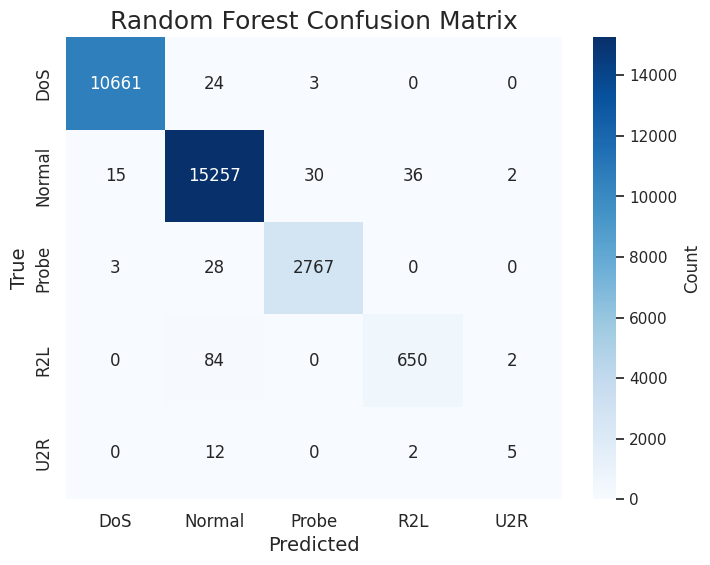

In [22]:
# Class labels you mapped: 0=DoS, 1=Normal, 2=Probe, 3=R2L, 4=U2R
class_labels = ['DoS', 'Normal', 'Probe', 'R2L', 'U2R']

# Compute confusion matrix
rf_cm = confusion_matrix(y_test_encoded, rf_preds_encoded)

# Plot confusion matrix
plot_confusion_matrix(rf_cm, 'Random Forest', class_labels, normalize=False)

In [23]:
from sklearn.preprocessing import label_binarize

# Binarize true labels for multiclass classification (one-vs-rest)
y_test_bin = label_binarize(y_test_encoded, classes=np.unique(y_test_encoded))  # One-hot encode true labels

# Get predicted probabilities (important: use encoded features)
rf_probs = rf_model.predict_proba(X_test_encoded)

# Initialize ROC plot
plt.figure(figsize=(10, 6))

# Number of classes
n_classes = y_test_bin.shape[1]

fpr = {}
tpr = {}
roc_auc = {}

<Figure size 1000x600 with 0 Axes>

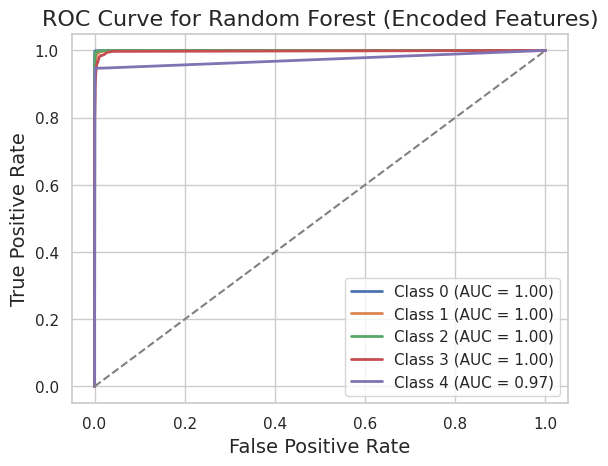

In [24]:
# Loop through each class for One-vs-Rest ROC curve
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], rf_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Add random classifier line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Titles and labels
plt.title('ROC Curve for Random Forest (Encoded Features)', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc="lower right")
plt.show()

## XGBClassifier Model

In [25]:
# 1. Initialize and Train the XGBoost model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train_encoded, y_train_encoded)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:27:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [26]:
# 2. Predict on Test Encoded Features
xgb_preds_encoded = xgb_model.predict(X_test_encoded)

# 3. Inverse transform predictions to original labels (optional, if you mapped manually)
xgb_preds = label_encoder.inverse_transform(xgb_preds_encoded)
y_test_labels = label_encoder.inverse_transform(y_test_encoded)

In [27]:
# Calculate accuracy
xgb_accuracy = accuracy_score(y_test, xgb_preds)
print(f"XGBoost Accuracy: {xgb_accuracy * 100:.2f} %")

XGBoost Accuracy: 99.25 %


In [28]:
# Generate classification report
print("\nXGBoost Classification Report:")
print(classification_report(y_test, xgb_preds))


XGBoost Classification Report:
              precision    recall  f1-score   support

         DoS       1.00      1.00      1.00     10688
      Normal       0.99      0.99      0.99     15340
       Probe       0.99      0.99      0.99      2798
         R2L       0.94      0.91      0.92       736
         U2R       0.45      0.26      0.33        19

    accuracy                           0.99     29581
   macro avg       0.88      0.83      0.85     29581
weighted avg       0.99      0.99      0.99     29581



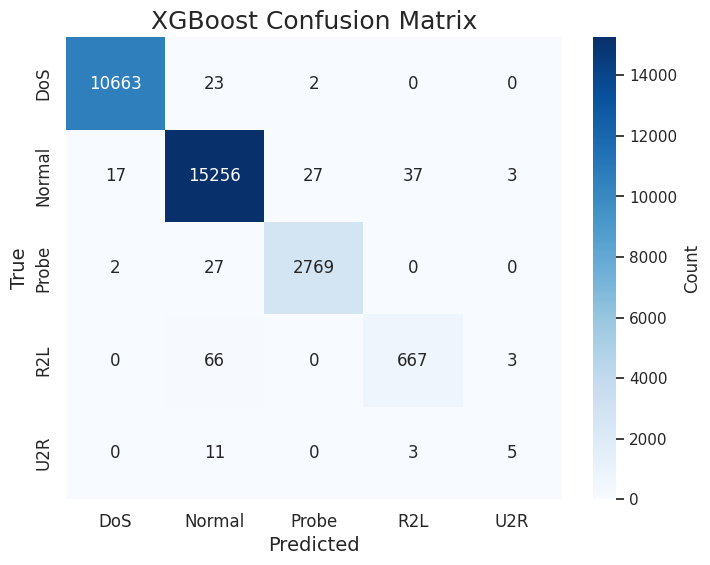

In [29]:
# 6. Confusion Matrix
xgb_cm = confusion_matrix(y_test_labels, xgb_preds)
# Class labels you mapped (broad categories)
class_labels = ['DoS', 'Normal', 'Probe', 'R2L', 'U2R']

plot_confusion_matrix(xgb_cm, 'XGBoost', class_labels, normalize=False)

In [30]:
# 7. ROC Curve
# Binarize true labels
y_test_bin = label_binarize(y_test_encoded, classes=np.unique(y_test_encoded))

# Predict Probabilities
xgb_probs = xgb_model.predict_proba(X_test_encoded)

# Plot ROC Curve
plt.figure(figsize=(10, 6))
n_classes = y_test_bin.shape[1]
fpr = {}
tpr = {}
roc_auc = {}

<Figure size 1000x600 with 0 Axes>

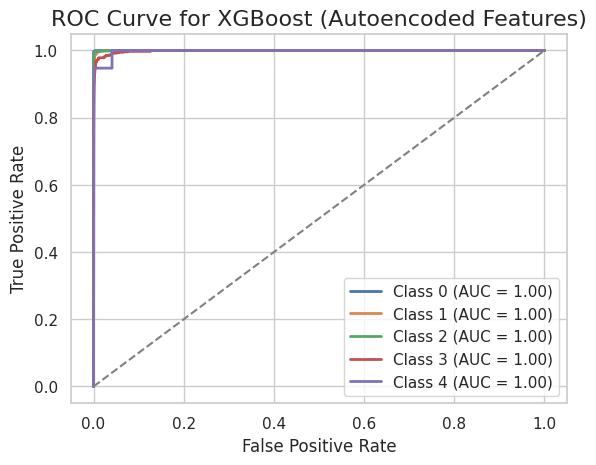

In [31]:
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], xgb_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve for XGBoost (Autoencoded Features)', fontsize=16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

## LGBMClassifier Model.

In [32]:
# 1. Initialize and Train the LGBM model
lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train_encoded, y_train_encoded)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.060351 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8160
[LightGBM] [Info] Number of data points in the train set: 118320, number of used features: 32
[LightGBM] [Info] Start training from score -1.028700
[LightGBM] [Info] Start training from score -0.652309
[LightGBM] [Info] Start training from score -2.361415
[LightGBM] [Info] Start training from score -3.627897
[LightGBM] [Info] Start training from score -7.096181


LGBMClassifier(random_state=42)

In [33]:
# 2. Predict on Test Encoded Features (Autoencoded features with 32 dimensions)
lgbm_preds_encoded = lgbm_model.predict(X_test_encoded)

# 3. Inverse transform predictions to original labels (optional, if you mapped manually)
lgbm_preds = label_encoder.inverse_transform(lgbm_preds_encoded)
y_test_labels = label_encoder.inverse_transform(y_test_encoded)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [34]:
# 4. Accuracy
lgbm_accuracy = accuracy_score(y_test_encoded, lgbm_preds_encoded)
print(f"LightGBM Test Accuracy: {lgbm_accuracy*100:.2f}%")

# 5. Classification Report
print("LightGBM Classification Report:")
print(classification_report(y_test_labels, lgbm_preds))

LightGBM Test Accuracy: 98.50%
LightGBM Classification Report:
              precision    recall  f1-score   support

         DoS       0.99      0.99      0.99     10688
      Normal       0.99      0.99      0.99     15340
       Probe       0.97      0.98      0.98      2798
         R2L       0.89      0.85      0.87       736
         U2R       0.14      0.37      0.21        19

    accuracy                           0.99     29581
   macro avg       0.80      0.83      0.81     29581
weighted avg       0.99      0.99      0.99     29581



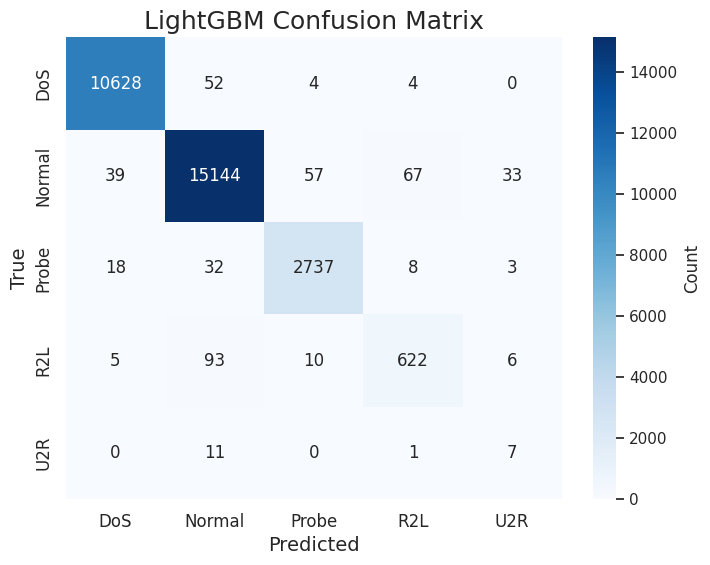

In [35]:
# 6. Confusion Matrix
lgbm_cm = confusion_matrix(y_test_labels, lgbm_preds)

# Class labels you mapped (broad categories)
class_labels = ['DoS', 'Normal', 'Probe', 'R2L', 'U2R']

plot_confusion_matrix(lgbm_cm, 'LightGBM', class_labels, normalize=False)

In [36]:
# 7. ROC Curve
# Binarize true labels
y_test_bin = label_binarize(y_test_encoded, classes=np.unique(y_test_encoded))

# Predict Probabilities
lgbm_probs = lgbm_model.predict_proba(X_test_encoded)

# Plot ROC Curve
plt.figure(figsize=(10, 6))
n_classes = y_test_bin.shape[1]
fpr = {}
tpr = {}
roc_auc = {}

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


<Figure size 1000x600 with 0 Axes>

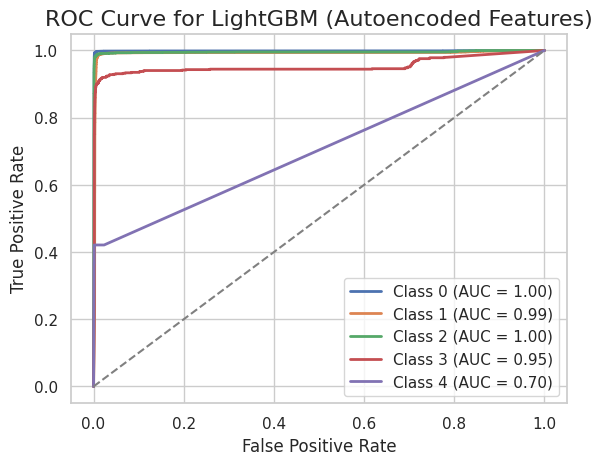

In [37]:
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], lgbm_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve for LightGBM (Autoencoded Features)', fontsize=16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

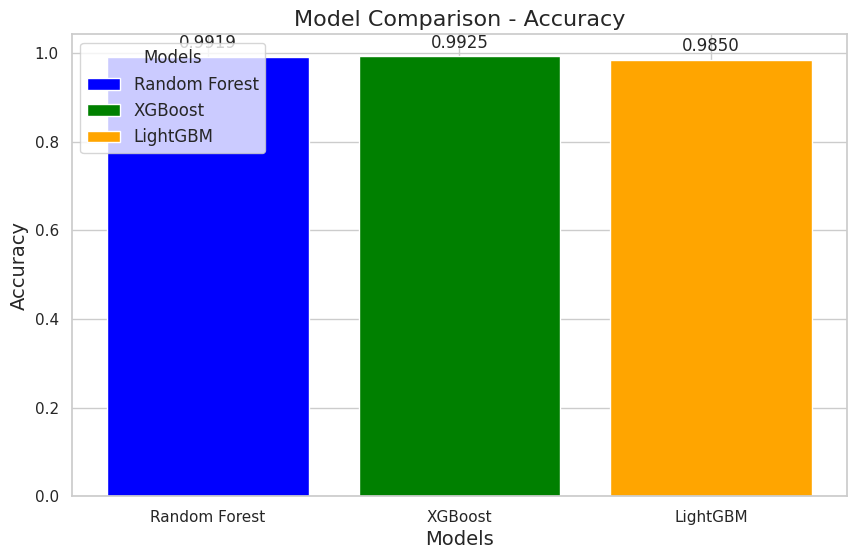

The best model is XGBoost with an accuracy of 0.9925


In [38]:
# Model names and their respective accuracies
models = ['Random Forest', 'XGBoost', 'LightGBM']
accuracies = [rf_accuracy, xgb_accuracy, lgbm_accuracy]

# Create the bar plot for model comparison
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=['blue', 'green', 'orange'])

# Add labels and title
plt.title('Model Comparison - Accuracy', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)

# Display the accuracy value on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.4f}', ha='center', va='bottom', fontsize=12)

# Add the legend with color description
plt.legend(bars, ['Random Forest', 'XGBoost', 'LightGBM'], title='Models', loc='upper left', fontsize=12)

# Show the plot
plt.show()

# Determine the best model based on accuracy
best_model_index = np.argmax(accuracies)
best_model = models[best_model_index]
best_accuracy = accuracies[best_model_index]

# Print the best model
print(f"The best model is {best_model} with an accuracy of {best_accuracy:.4f}")

#Regression Models.

## Random Forest Regression Model.

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [40]:
# Initialize the Random Forest Regressor model
rf_regressor = RandomForestRegressor(random_state=42)

# Train the model on the preprocessed data (scaled features)
rf_regressor.fit(X_train_scaled, y_train_encoded)

RandomForestRegressor(random_state=42)

In [41]:
# Predict on the test set
rf_preds = rf_regressor.predict(X_test_scaled)

In [42]:
# Evaluate the model using performance metrics
rf_mae = mean_absolute_error(y_test_encoded, rf_preds)
rf_mse = mean_squared_error(y_test_encoded, rf_preds)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test_encoded, rf_preds)

In [43]:
# Print evaluation metrics
print(f"Random Forest Regressor Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {rf_mae * 100:.2f} %")
print(f"Mean Squared Error (MSE): {rf_mse * 100:.2f} %")
print(f"Root Mean Squared Error (RMSE): {rf_rmse * 100:.2f} %")
print(f"R-squared (R2): {rf_r2 * 100:.2f} %")

Random Forest Regressor Evaluation Metrics:
Mean Absolute Error (MAE): 1.14 %
Mean Squared Error (MSE): 1.04 %
Root Mean Squared Error (RMSE): 10.21 %
R-squared (R2): 97.97 %


## Linear Regression Model.

In [44]:
# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model using the preprocessed training data
lr_model.fit(X_train_scaled, y_train_encoded)

LinearRegression()

In [45]:
# Predict on the test set
lr_preds = lr_model.predict(X_test_scaled)

In [46]:
# Evaluate the model using performance metrics
lr_mae = mean_absolute_error(y_test_encoded, lr_preds)
lr_mse = mean_squared_error(y_test_encoded, lr_preds)
# Manually calculate RMSE (Root Mean Squared Error)
lr_rmse = np.sqrt(lr_mse)
# Calculate R-squared
lr_r2 = r2_score(y_test_encoded, lr_preds)

In [47]:
# Print evaluation metrics
print(f"Linear Regression Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {lr_mae * 100:.2f} %")
print(f"Mean Squared Error (MSE): {lr_mse * 100:.2f} %")
print(f"Root Mean Squared Error (RMSE): {lr_rmse * 100:.2f} %")
print(f"R-squared (R2): {lr_r2 * 100:.2f} %")

Linear Regression Evaluation Metrics:
Mean Absolute Error (MAE): 21.42 %
Mean Squared Error (MSE): 15.37 %
Root Mean Squared Error (RMSE): 39.21 %
R-squared (R2): 70.15 %


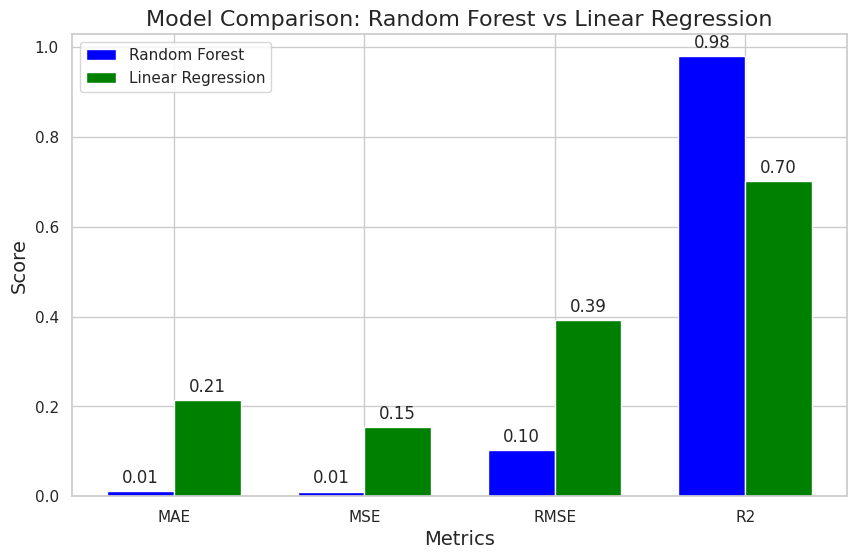


Based on the evaluation metrics, the best model is: Random Forest


In [48]:
import matplotlib.pyplot as plt
import numpy as np

# Create a list of metrics
metrics = ['MAE', 'MSE', 'RMSE', 'R2']

# Store metrics for both models
rf_metrics = [rf_mae, rf_mse, rf_rmse, rf_r2]
lr_metrics = [lr_mae, lr_mse, lr_rmse, lr_r2]

# Bar width
bar_width = 0.35

# Set the positions for the bars
index = np.arange(len(metrics))

# Create the bar plot for model comparison
plt.figure(figsize=(10, 6))

# Plot Random Forest metrics
rf_bars = plt.bar(index, rf_metrics, bar_width, label='Random Forest', color='blue')

# Plot Linear Regression metrics next to Random Forest
lr_bars = plt.bar(index + bar_width, lr_metrics, bar_width, label='Linear Regression', color='green')

# Add data labels to the bars
for bar in rf_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom', fontsize=12)

for bar in lr_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom', fontsize=12)

# Add title and labels
plt.title('Model Comparison: Random Forest vs Linear Regression', fontsize=16)
plt.xlabel('Metrics', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.xticks(index + bar_width / 2, metrics)  # Center x-ticks between bars
plt.legend()

# Show the plot
plt.show()

# Determine the best model based on the metrics
best_model = "Random Forest" if (rf_mae < lr_mae and rf_mse < lr_mse and rf_rmse < lr_rmse and rf_r2 > lr_r2) else "Linear Regression"

print(f"\nBased on the evaluation metrics, the best model is: {best_model}")

# Unsupervised Learning Model

##DBSCAN Model

In [49]:
from sklearn.cluster import DBSCAN
# Step 1: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X_scaled)

DBSCAN()

In [50]:
# Step 3: Assign the cluster labels
df['Cluster'] = dbscan.labels_

# Step 4: PCA for dimensionality reduction to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 5: Create a mask for noise points (DBSCAN assigns noise as -1)
mask = df['Cluster'] != -1

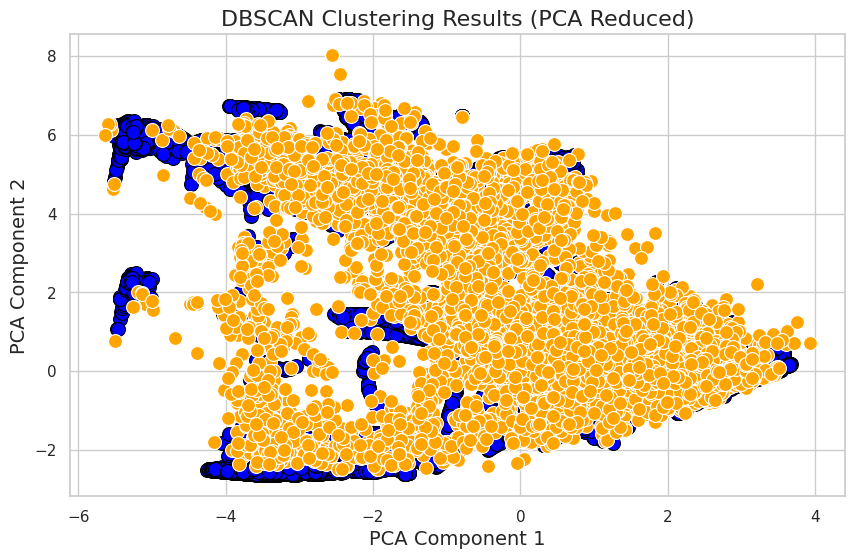

In [51]:
# Step 6: Visualize the clusters in 2D (ignore noise points for the plot)
plt.figure(figsize=(10, 6))

# Plot the clusters without labels
sns.scatterplot(x=X_pca[mask, 0], y=X_pca[mask, 1], color='blue', markers='o', s=100, edgecolor='black')

# Plot noise points separately (as black points), without labels
sns.scatterplot(x=X_pca[~mask, 0], y=X_pca[~mask, 1], color='orange', marker='o', s=100)

# Title and labels
plt.title('DBSCAN Clustering Results (PCA Reduced)', fontsize=16)
plt.xlabel('PCA Component 1', fontsize=14)
plt.ylabel('PCA Component 2', fontsize=14)

# Remove the legend completely
plt.legend([],[], frameon=False)

# Show the plot without a legend or any labels
plt.show()